## 투빅스 18기 Week4 Clustering 과제 - 18기 이다인

## Clustering 해보기
### 1. Preprocssing / EDA
지금까지 배운 내용을 토대로 해당 데이터에 대해 자유롭게 전처리와 EDA를 진행해주세요.
### 2. Clustering 
수업 내용 및 실습 자료를 참고하여 클러스터링을 자유롭게 진행해주세요. 한 알고리즘에 대해 파라미터를 바꿔가며 비교를 해도 되고, 여러 알고리즘의 결과를 비교해도 됩니다.
### 3. Evaluation
결과에 대한 평가를 진행하고, 나름의 해석을 달아주세요.

**데이터:** [Mall Customer Segmentation Data| Kaggle](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)

---

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore") 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 0. 데이터 불러오기

In [2]:
df = pd.read_csv("Mall_Customers.csv", index_col = 0)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


## 1. 데이터 전처리 및 EDA

### 1.1 데이터 전처리

In [3]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [5]:
for i in range(len(df.columns)):
    print(df.columns[i])
    print(df[df.columns[i]].unique())
    print()

Gender
['Male' 'Female']

Age
[19 21 20 23 31 22 35 64 30 67 58 24 37 52 25 46 54 29 45 40 60 53 18 49
 42 36 65 48 50 27 33 59 47 51 69 70 63 43 68 32 26 57 38 55 34 66 39 44
 28 56 41]

Annual Income (k$)
[ 15  16  17  18  19  20  21  23  24  25  28  29  30  33  34  37  38  39
  40  42  43  44  46  47  48  49  50  54  57  58  59  60  61  62  63  64
  65  67  69  70  71  72  73  74  75  76  77  78  79  81  85  86  87  88
  93  97  98  99 101 103 113 120 126 137]

Spending Score (1-100)
[39 81  6 77 40 76 94  3 72 14 99 15 13 79 35 66 29 98 73  5 82 32 61 31
 87  4 92 17 26 75 36 28 65 55 47 42 52 60 54 45 41 50 46 51 56 59 48 49
 53 44 57 58 43 91 95 11  9 34 71 88  7 10 93 12 97 74 22 90 20 16 89  1
 78 83 27 63 86 69 24 68 85 23  8 18]



* 데이터는 총 5개의 coluumn으로 이루어져 있다. 
* feature 타입 중 `Gender`의 타입이 object형이기 때문에 encoding을 진행하였다.
* 또한 결측치는 없는 것을 확인되었다.

In [6]:
# 'Male':1, 'Female':0로 인코딩
df['Gender'].replace({'Male':1, 'Female':0},inplace=True)

### 1.2 EDA

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

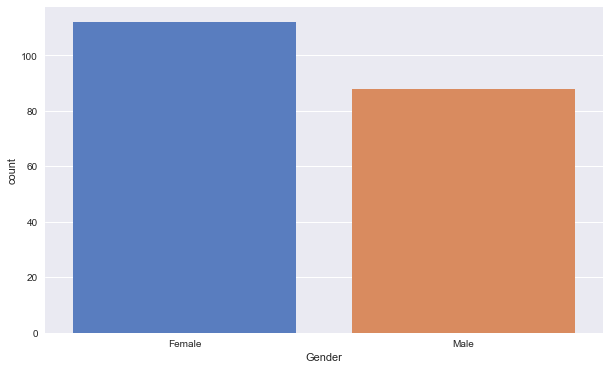

In [8]:
sns.set_palette('muted')
plt.figure(figsize=(10, 6))
sns.countplot('Gender' , data = df)
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()

* 성별의 경우가 여자가 남자보다 많은 것을 알 수 있다.

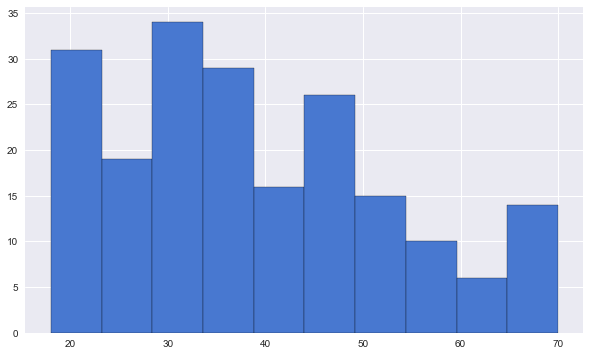

In [9]:
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=10, edgecolor='k')
plt.show()

* 나이의 경우 20-30대 중반이 가장 많은 분포를 띠고 있는 것 같다.

<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

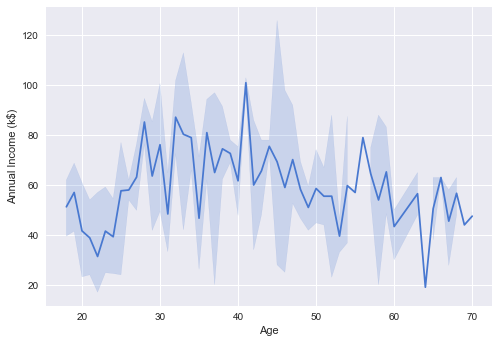

In [10]:
sns.lineplot('Age', 'Annual Income (k$)', data=df, palette='Set2')

* 나이에 따른 연간소득을 그려보았을 때 20대 중반부터 연간 소득이 증가하며 40대 이후 점차 감소하는 경향을 보이고 있다.

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

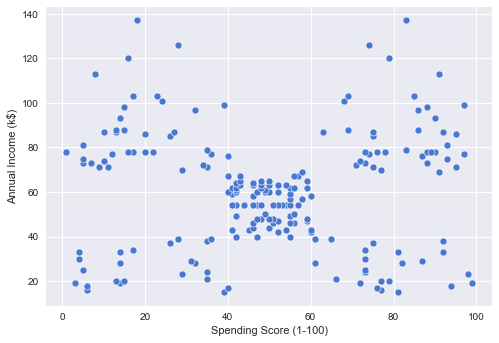

In [11]:
sns.scatterplot(x='Spending Score (1-100)', y='Annual Income (k$)', data=df, palette='Set2')

* `Spending Score`와 `Annual Income`의 scatter plot을 그려보았을 때 군집이 5개 정도로 나뉘는 것을 확인할 수 있었으며, 군집화하기에 적합할 것 같다고 판단하였다.

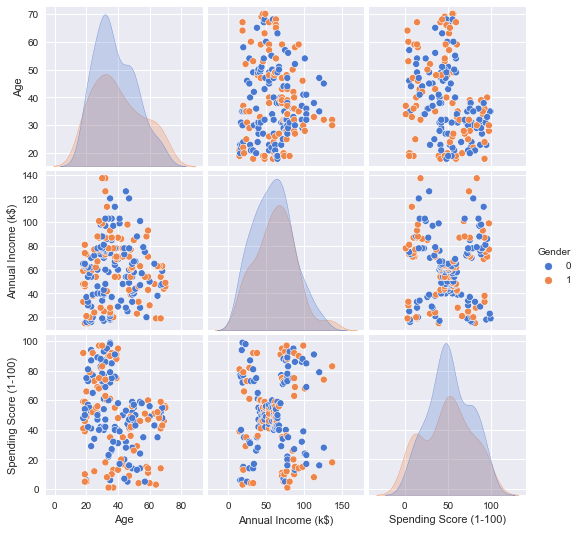

In [12]:
sns.pairplot(df, hue="Gender")
plt.show()

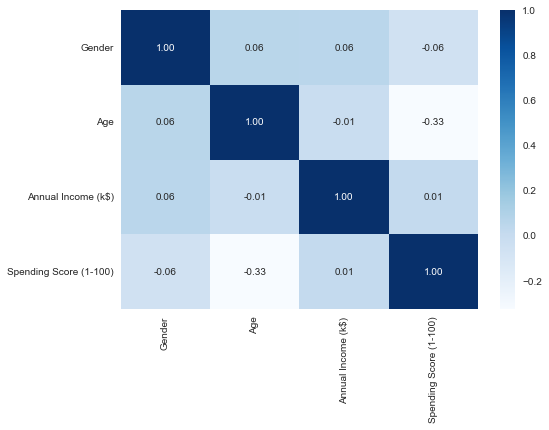

In [13]:
sns.heatmap(df.corr(), annot=True, fmt = '.2f', cmap='Blues')  
plt.show()

* 변수간의 상관관계를 확인해보았을 때 크게 높은 상관관계를 보이는 변수는 없었다.

## 2. Modeling

In [14]:
# 군집화를 하며 사용하는 알고리즘 중 거리기반 알고리즘이 있기 때문에 표준화를 진행해주었다.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

### 2.1 K-Means Clustering

In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#### 2.1.2 최적의 k 찾기

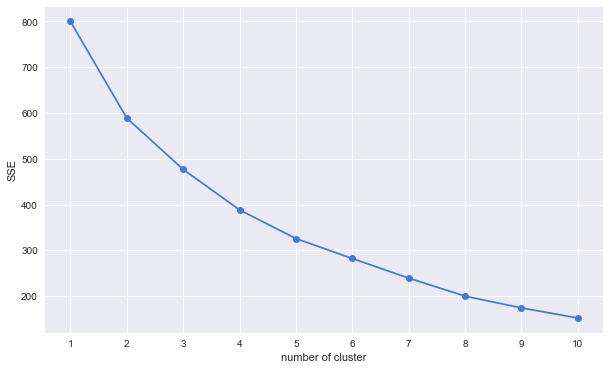

In [16]:
# elbow method
# 스케일링한 데이터를 통해 elbow point 찾기

def elbow(x): #elbow point를 구하기 위한 함수 생성
    k = []
    sse = []
    
    for i in range(1, 11):
        model = KMeans(n_clusters = i)
        model.fit(x)
        sse.append(model.inertia_)
        k.append(i)
    
    plt.figure(figsize=(10, 6))
    plt.plot(k, sse, marker='o')
    plt.xlabel("number of cluster")
    plt.ylabel("SSE")
    plt.xticks(range(1, 11))
    plt.show()
    

elbow(df)

* elbow point가 확실하게 보이지는 않기 때문에 silhouette점수를 통해서 k의 개수가 3,4,5,6인 지점을 다시 확인해보려고 한다.

In [17]:
# Silhouette 계수 구하기 

k_3 = KMeans(n_clusters = 3).fit(df)
k_4 = KMeans(n_clusters = 4).fit(df)
k_5 = KMeans(n_clusters = 5).fit(df)
k_6 = KMeans(n_clusters = 6).fit(df)

k_3.fit_predict(df)
k_4.fit_predict(df)
k_5.fit_predict(df)
k_6.fit_predict(df)

score1 = silhouette_score(df, k_3.labels_, metric="euclidean")
score2 = silhouette_score(df, k_4.labels_, metric="euclidean")
score3 = silhouette_score(df, k_5.labels_, metric="euclidean")
score4 = silhouette_score(df, k_6.labels_, metric="euclidean")

print('K = 3일 때 Silhouette 계수: ',score1)
print('K = 4일 때 Silhouette 계수: ',score2)     
print('K = 5일 때 Silhouette 계수: ',score3)
print('K = 6일 때 Silhouette 계수: ',score4)

K = 3일 때 Silhouette 계수:  0.25951265087431563
K = 4일 때 Silhouette 계수:  0.29676146947439397
K = 5일 때 Silhouette 계수:  0.31709067955763137
K = 6일 때 Silhouette 계수:  0.3270262149817373


* k가 6일 때 가장 silhouette 점수가 높은 것을 알 수 있다. 따라서 k를 6로 지정하고 학습을 진행하려고 한다.

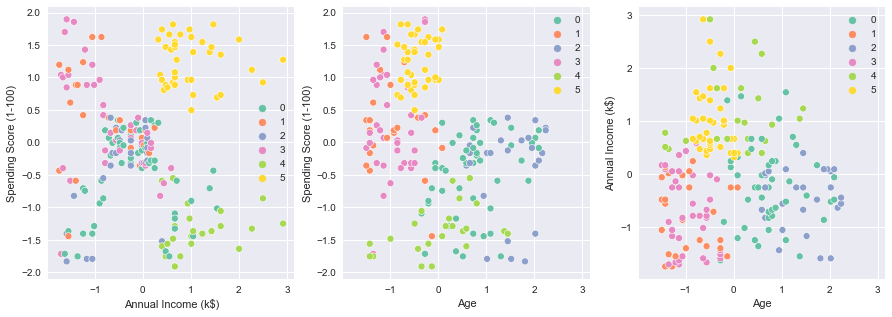

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True)
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, hue=k_6.labels_, palette='Set2', ax=axes[0])
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=df, hue=k_6.labels_, palette='Set2' , ax=axes[1])
sns.scatterplot(x='Age', y='Annual Income (k$)', data=df, hue=k_6.labels_, palette='Set2' , ax=axes[2])
plt.show()

* 학습이 거의 진행되지 않은 것을 알 수 있다.
* 더 나은 학습을 위해 다른 k를 사용하여 학습을 해보아도 결과에는 별 차이가 없었다,,

### 2.2 Hierarchical Clustering

In [19]:
from scipy.cluster.hierarchy import linkage, dendrogram

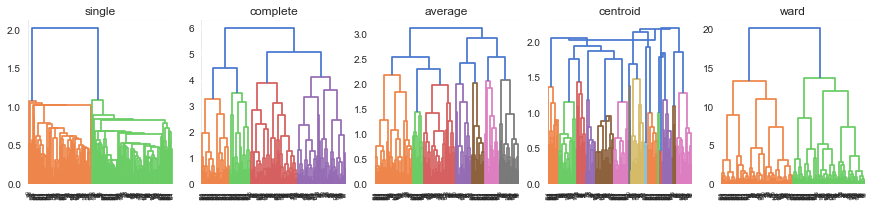

In [20]:
linkage_list = ['single', 'complete', 'average', 'centroid', 'ward']

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 3))

for i in range(len(linkage_list)):
    Z = linkage(df, method=linkage_list[i])
    den = dendrogram(Z, ax=axes[i])
    axes[i].title.set_text(linkage_list[i])
plt.show()

* dendrogram 을 통해 군집화를 비교해본 결과 `complete`와 `average`가 적당한 선에서 군집화가 잘 일어났다고 판단하여 클러스터링을 진행하였다.

In [21]:
#군집 개수는 5개로 설정한 후 진행해보았다. 
from sklearn.cluster import AgglomerativeClustering

clt_clustering = AgglomerativeClustering(n_clusters=5, linkage='complete')
clt = clt_clustering.fit_predict(df)

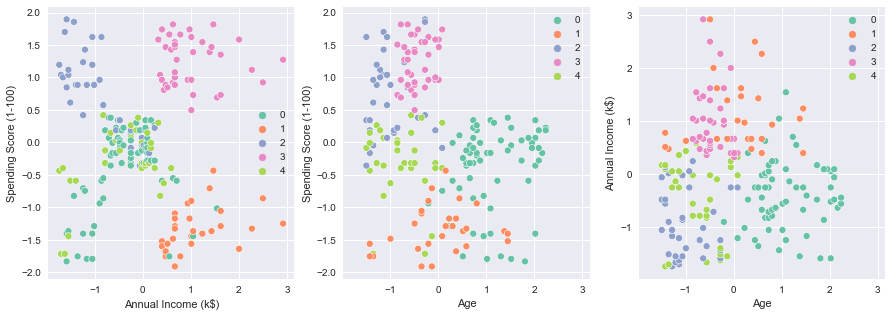

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True)
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, hue=clt, palette='Set2', ax=axes[0])
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=df, hue=clt, palette='Set2' , ax=axes[1])
sns.scatterplot(x='Age', y='Annual Income (k$)', data=df, hue=clt, palette='Set2' , ax=axes[2])
plt.show()

In [23]:
from sklearn.cluster import AgglomerativeClustering

avg_clustering = AgglomerativeClustering(n_clusters=5, linkage='average')
avg = avg_clustering.fit_predict(df)

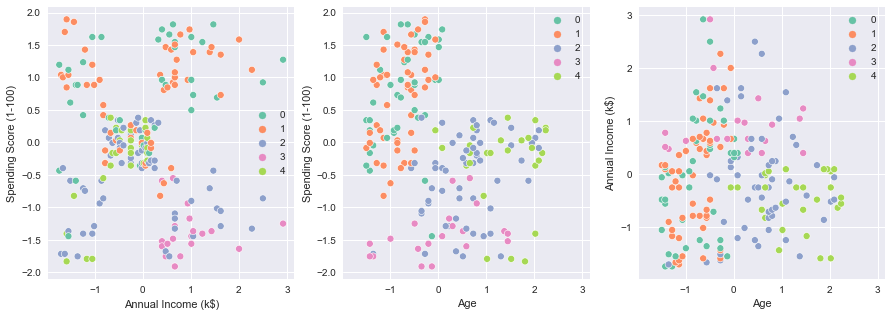

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True)
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, hue=avg, palette='Set2', ax=axes[0])
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=df, hue=avg, palette='Set2' , ax=axes[1])
sns.scatterplot(x='Age', y='Annual Income (k$)', data=df, hue=avg, palette='Set2' , ax=axes[2])
plt.show()

* 먼저 `complete`와 `average`를 비교해보면, `complete`는 군집화가 어느정도 되었다고 말할 수 있지만, `average`는 거의 군집화가 나타나지 않은 것을 알 수 있다.
* 또한 `complete`를 통해 계층적 군집화를 진행하였을 때가 kmeans를 통해 군집화를 진행하였을 때보다 잘 되었다는 것을 알 수 있다.

### 2.3 DBSCAN

In [25]:
from sklearn.cluster import DBSCAN

In [30]:
for min_sample in [3, 5, 7, 9]:
    for eps in [0.05, 0.2, 0.4, 0.9, 1, 3, 5, 7, 9, 11, 13, 15, 17]:
        dbscan = DBSCAN(min_samples=min_sample, eps=eps)
        labels = dbscan.fit_predict(df) 
        print('︎min_sample:{}, eps:{}'.format(min_sample, eps))
        print('cluster 수: {}'.format(len(np.unique(labels))), end=', ')
        print('cluster 크기: {}\n'.format(np.bincount(labels+1)))

︎min_sample:3, eps:0.05
cluster 수: 1, cluster 크기: [200]

︎min_sample:3, eps:0.2
cluster 수: 8, cluster 크기: [179   3   3   3   3   3   3   3]

︎min_sample:3, eps:0.4
cluster 수: 19, cluster 크기: [97  3  3  4 13  7  3  3  7  9  4  3  3  5  8 18  3  3  4]

︎min_sample:3, eps:0.9
cluster 수: 4, cluster 크기: [  8  77 111   4]

︎min_sample:3, eps:1
cluster 수: 4, cluster 크기: [  8  77 111   4]

︎min_sample:3, eps:3
cluster 수: 1, cluster 크기: [  0 200]

︎min_sample:3, eps:5
cluster 수: 1, cluster 크기: [  0 200]

︎min_sample:3, eps:7
cluster 수: 1, cluster 크기: [  0 200]

︎min_sample:3, eps:9
cluster 수: 1, cluster 크기: [  0 200]

︎min_sample:3, eps:11
cluster 수: 1, cluster 크기: [  0 200]

︎min_sample:3, eps:13
cluster 수: 1, cluster 크기: [  0 200]

︎min_sample:3, eps:15
cluster 수: 1, cluster 크기: [  0 200]

︎min_sample:3, eps:17
cluster 수: 1, cluster 크기: [  0 200]

︎min_sample:5, eps:0.05
cluster 수: 1, cluster 크기: [200]

︎min_sample:5, eps:0.2
cluster 수: 1, cluster 크기: [200]

︎min_sample:5, eps:0.4
cluster 수: 

* min_sample가 9일 때와 eps가 0.9 일 때 데이터가 가장 고르게 분포된 것으로 보여 선택하였다.

In [31]:
np.random.seed(0)
dbscan = DBSCAN(eps=0.9, min_samples=9)
db = dbscan.fit_predict(df)

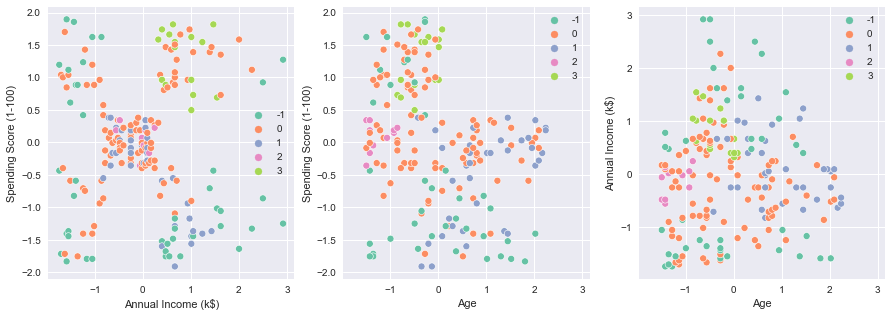

In [34]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True)
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, hue=db, palette='Set2', ax=axes[0])
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=df, hue=db, palette='Set2' , ax=axes[1])
sns.scatterplot(x='Age', y='Annual Income (k$)', data=df, hue=db, palette='Set2' , ax=axes[2])
plt.show()

* dbscan을 활용하여 군집화를 진행해본 결과 이 모델 또한 거의 군집화가 되지 않은 것을 확인할 수 있다,,,
* 3가지 모형을 통해 학습 시켜본 결과 comlete linkage를 사용한 계층적 군집화 > kmeans > average linkage를 사용한 계층적 군집화> dbscan 순으로 군집화가 잘 되었다고 생각한다.
* 하지만 comlete linkage를 사용한 계층적 군집화조차 군집화가 잘 되었다고 판단할만한 결과가 나온 것은 아니었으며, 대부분이 군집화가 잘 되지 못하였다,,,